### Import Libraries


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

### Downloading Data Set into a dataframe

In [67]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [68]:
#Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
#understand the distribution and relationships between the variables.

#Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
#variables into dummy variables if necessary.

### Understand the Data via EDA

In [69]:
df.describe() #details on mean/std/ values of reach column

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### Identify Null Values

In [71]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values

In [72]:
# Spaces were fixed in the column names
df.columns = df.columns.str.strip()
df.columns 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [73]:
# Check for duplicate values
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### Create a scatter plot matrix of all pairs of variables in the dataset, with different colors for each outcome class.



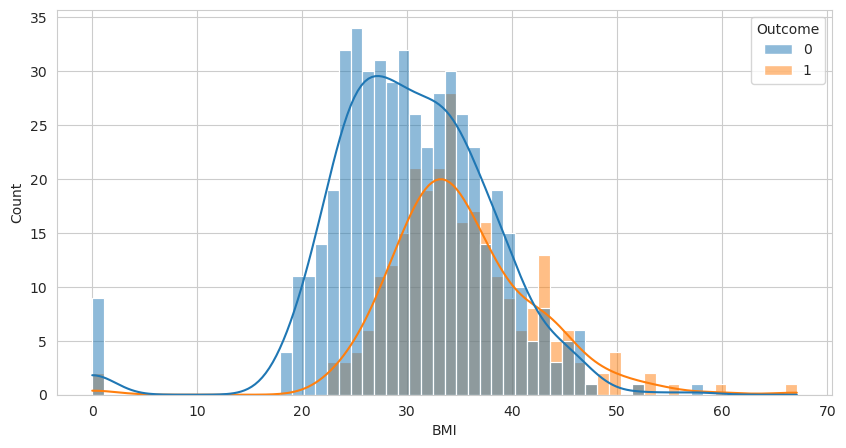

In [74]:
#Creating a plot to show how BMI impacts diabetes, seems there is a clear peak in diabetic cases between 30-40 
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='BMI', kde=True, hue='Outcome', bins=60, ax=ax)
plt.show()

BMI between 30-40 seems to be have the highest impact on Diabetes postivity

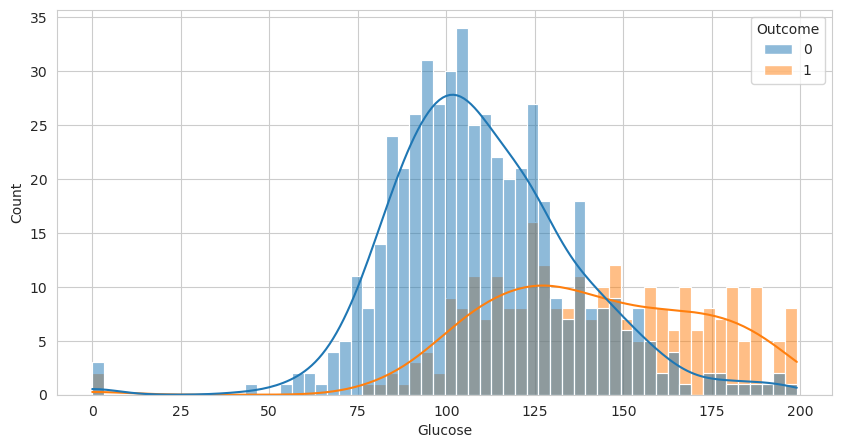

In [75]:
#Creating a plot to show how Glucose level impacts diabetes, clearly higher the glucose more likely its diabetes
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Glucose', kde=True, hue='Outcome', bins=60, ax=ax)
plt.show()

Higher the Glucose, higher the chances of Diabetes

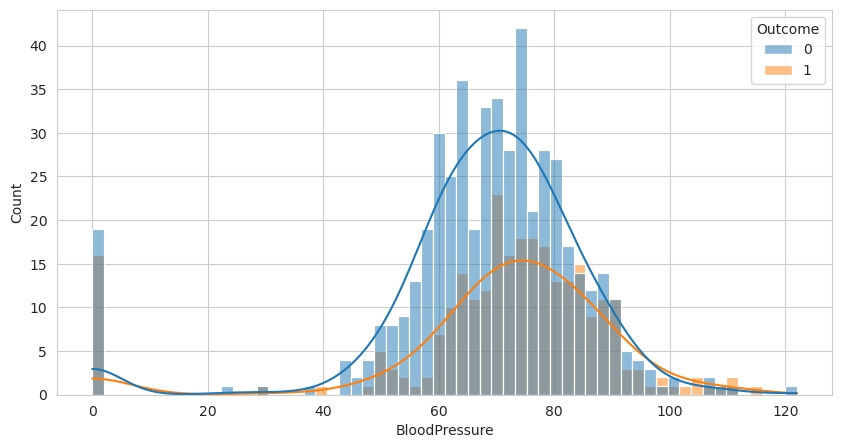

In [76]:
#Creating a plot to show how Glucose level impacts diabetes
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='BloodPressure', kde=True, hue='Outcome', bins=60, ax=ax)
plt.show()

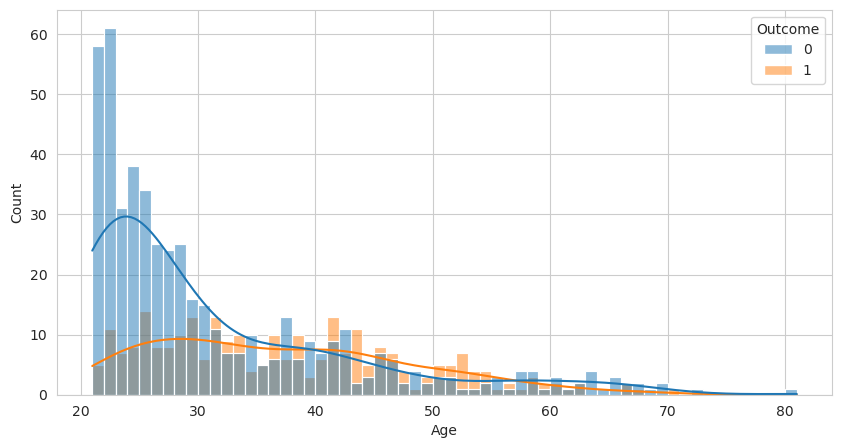

In [77]:
#Creating a plot to show how Age impacts diabetes
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Age', kde=True, hue='Outcome', bins=60, ax=ax)
plt.show()

Diabetes risks increase after the age of 30 and is negligible before that

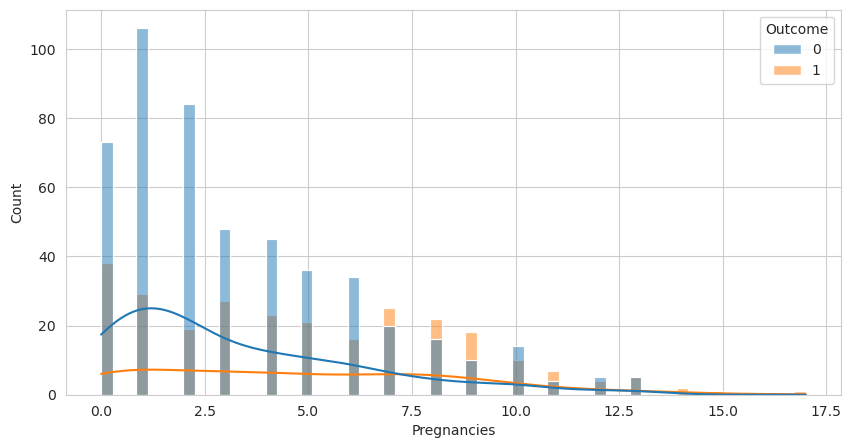

In [78]:
#Creating a plot to show how Pregnancies impacts diabetes
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Pregnancies', kde=True, hue='Outcome', bins=60, ax=ax)
plt.show()

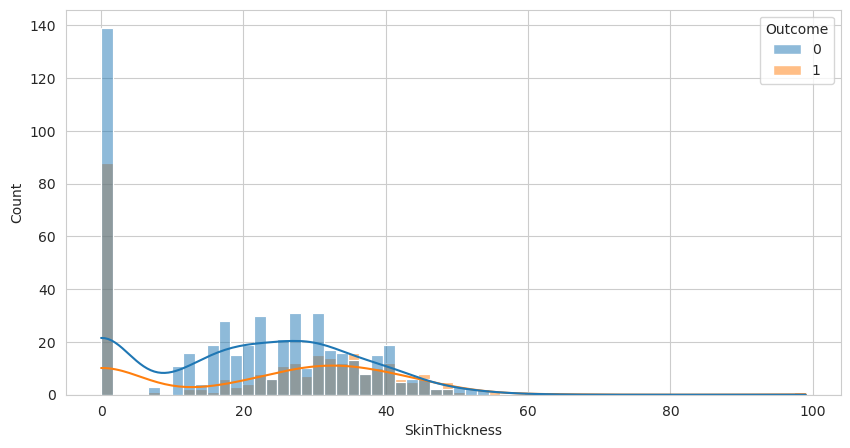

In [79]:
#Creating a plot to show how SkinThickness impacts diabetes
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='SkinThickness', kde=True, hue='Outcome', bins=60, ax=ax)
plt.show()

The Diabetes risk peaks between 20-40 skin thickness

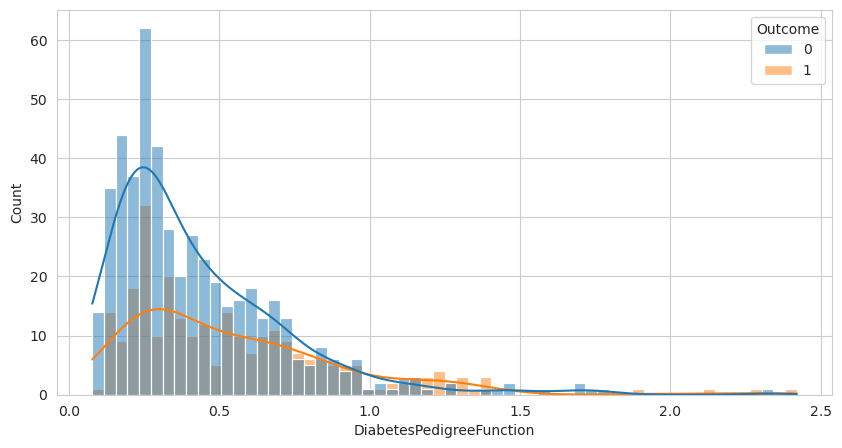

In [80]:
#Creating a plot to show how DiabetesPedigreeFunction level impacts diabetes
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='DiabetesPedigreeFunction', kde=True, hue='Outcome', bins=60, ax=ax)
plt.show()

Higher the the PedigressFunction higher the risk of Diabetes

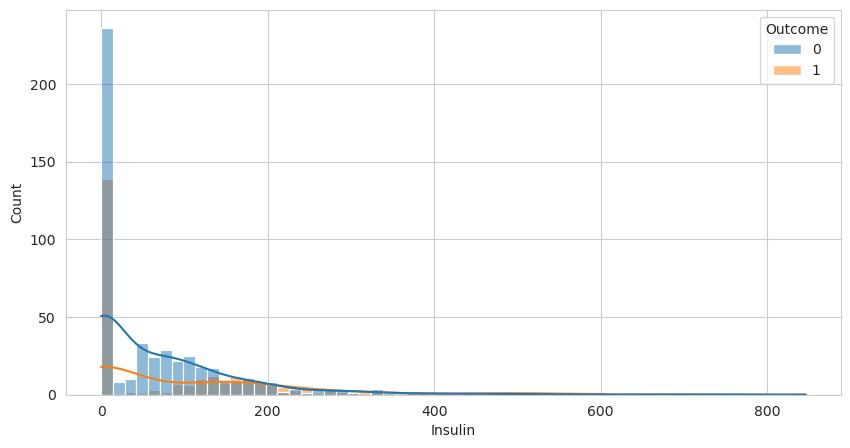

In [81]:
#Creating a plot to show how Insulin impacts diabetes
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Insulin', kde=True, hue='Outcome', bins=60, ax=ax)
plt.show()

Insulin and Diabetes risk are inversely proportional to each other

In [82]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


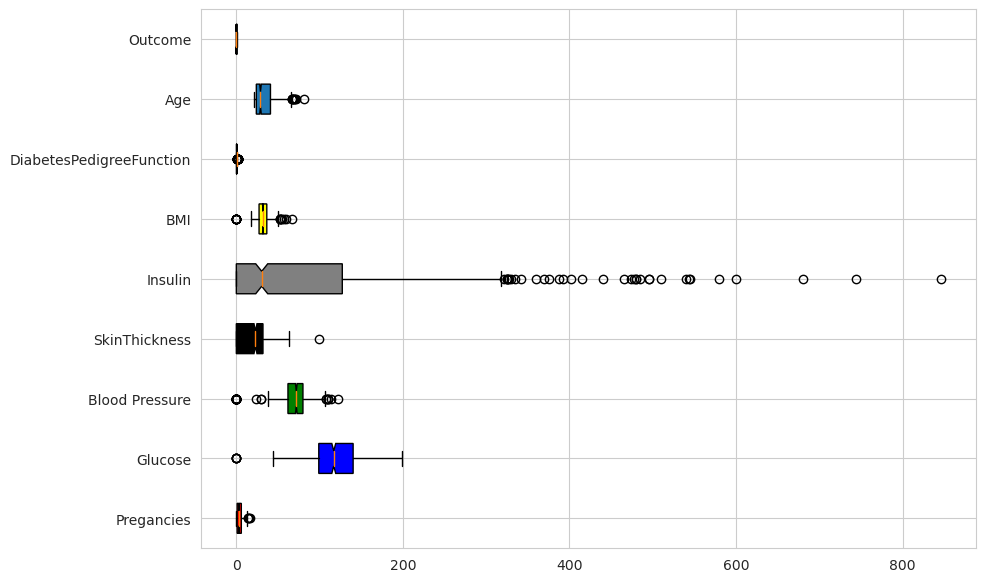

In [83]:

fig = plt.figure(figsize=(10, 7))

#Comparing outcomes for different parameters on boxplots
bp=plt.boxplot(df, labels=['Pregancies', 'Glucose', 'Blood Pressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome'], patch_artist = True, notch =True, vert=False) 
# Set colors
colors = ['red', 'blue','green','black','grey','yellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

Identifying outliers via Box Plot, we can clearly see outliers in the data set with Insulin having the highest number of outliers

###  Fix Outliers with Z Score

In [84]:
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

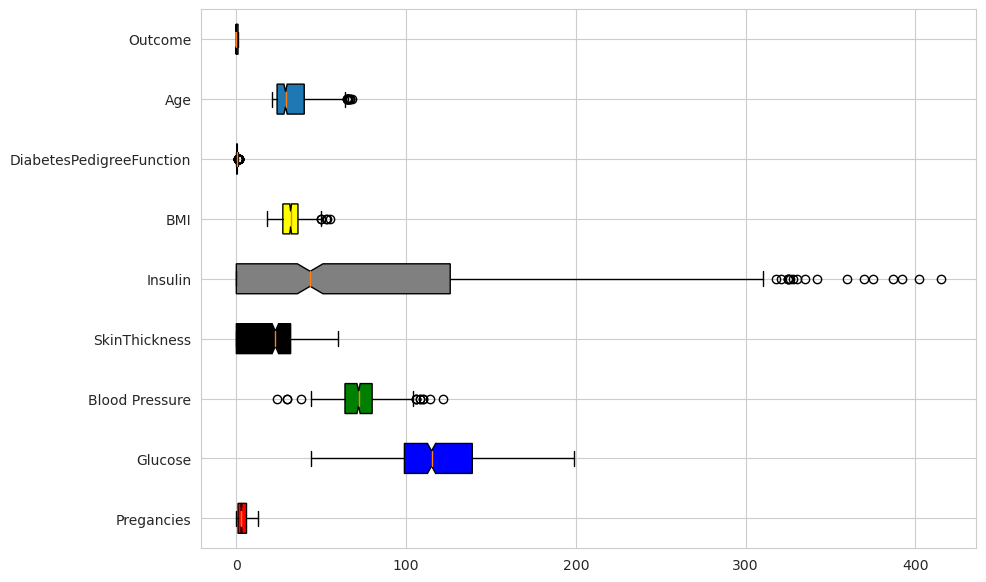

In [85]:

fig = plt.figure(figsize=(10, 7))

#Comparing outcomes for different parameters on boxplots
bp=plt.boxplot(df, labels=['Pregancies', 'Glucose', 'Blood Pressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age','Outcome'], patch_artist = True, notch =True, vert=False) 
# Set colors
colors = ['red', 'blue','green','black','grey','yellow']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    
plt.show()

Reduced the number of outliers with Z-Score

### Categorical column is already coded as 0 and 1 hence we dont need to encode it further

In [86]:
#Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

### Spliting the data in Train and Test Sets

In [87]:
from sklearn.model_selection import train_test_split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 312            2      155             74             17       96  26.6   
 126            3      120             70             30      135  42.9   
 96             2       92             62             28        0  31.6   
 61             8      133             72              0        0  32.9   
 245            9      184             85             15        0  30.0   
 ..           ...      ...            ...            ...      ...   ...   
 84             5      137            108              0        0  48.8   
 121            6      111             64             39        0  34.2   
 304            3      150             76              0        0  21.0   
 491            2       89             90             30        0  33.5   
 117            5       78             48              0        0  33.7   
 
      DiabetesPedigreeFunction  Age  
 312                     0.433   27  
 126                  

In [88]:
#Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
#cross-validation to optimize the hyperparameters and avoid overfitting.

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,4,6,8,10,12]
}

dt = DecisionTreeClassifier(random_state=42)
# Fit the grid search object to the training data and obtain the best hyperparameters

grid_search = GridSearchCV(dt, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(best_params)

{'criterion': 'entropy', 'max_depth': 4}


In [90]:
dt = DecisionTreeClassifier(**best_params, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

[Text(0.45689655172413796, 0.9, 'x[1] <= 114.5\nentropy = 0.9\nsamples = 550\nvalue = [376, 174]'),
 Text(0.1896551724137931, 0.7, 'x[6] <= 0.661\nentropy = 0.549\nsamples = 268\nvalue = [234, 34]'),
 Text(0.06896551724137931, 0.5, 'x[5] <= 26.45\nentropy = 0.392\nsamples = 220\nvalue = [203, 17]'),
 Text(0.034482758620689655, 0.3, 'entropy = 0.0\nsamples = 67\nvalue = [67, 0]'),
 Text(0.10344827586206896, 0.3, 'x[7] <= 35.5\nentropy = 0.503\nsamples = 153\nvalue = [136, 17]'),
 Text(0.06896551724137931, 0.1, 'entropy = 0.349\nsamples = 107\nvalue = [100, 7]'),
 Text(0.13793103448275862, 0.1, 'entropy = 0.755\nsamples = 46\nvalue = [36, 10]'),
 Text(0.3103448275862069, 0.5, 'x[0] <= 2.5\nentropy = 0.938\nsamples = 48\nvalue = [31, 17]'),
 Text(0.2413793103448276, 0.3, 'x[1] <= 103.5\nentropy = 0.544\nsamples = 24\nvalue = [21, 3]'),
 Text(0.20689655172413793, 0.1, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.27586206896551724, 0.1, 'entropy = 0.881\nsamples = 10\nvalue = [7

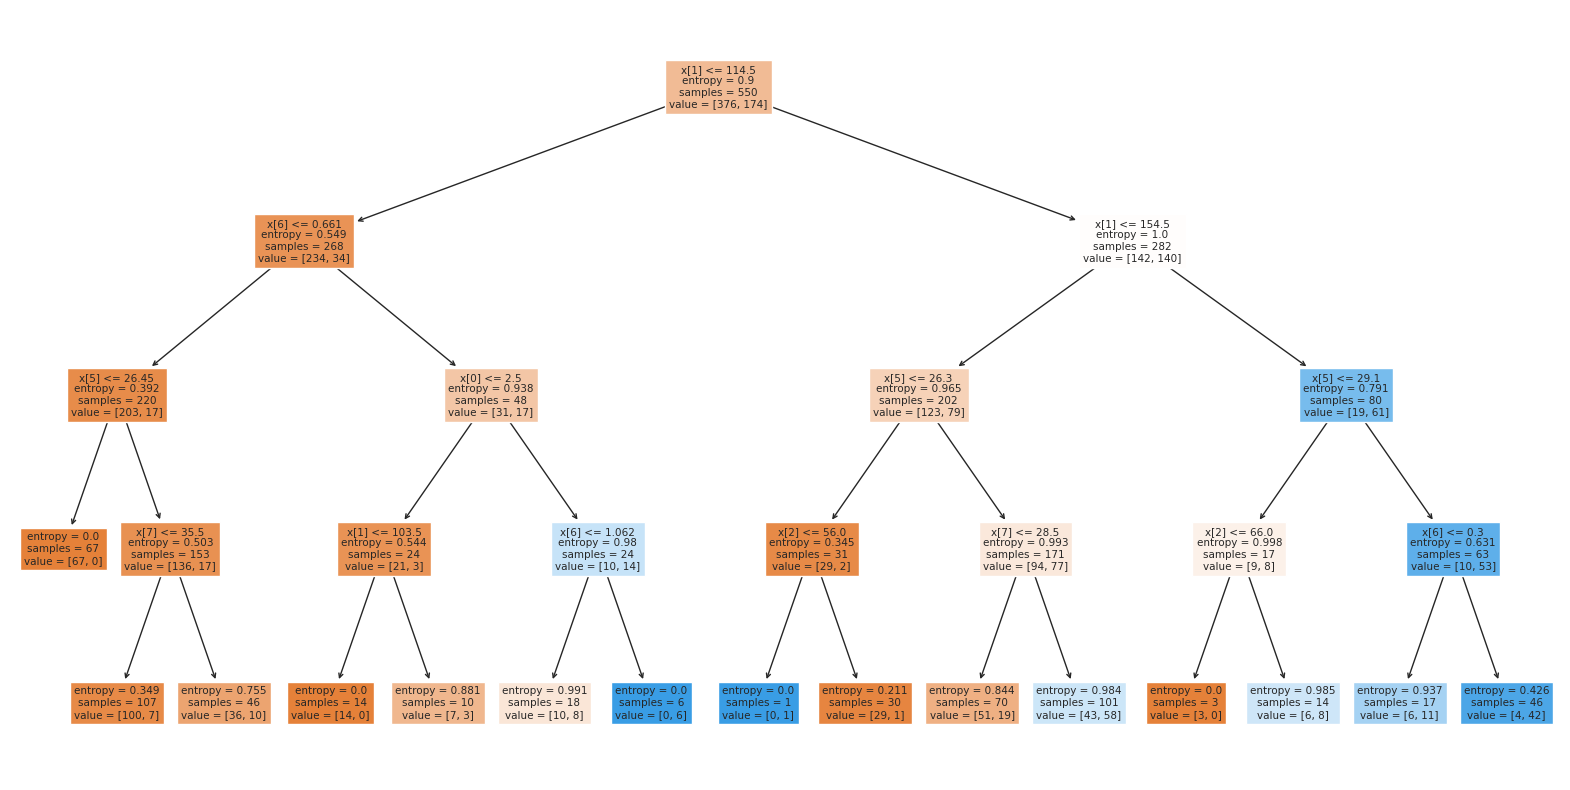

In [91]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt,filled=True)

In [92]:
#Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
#precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

              precision    recall  f1-score   support

           0       0.76      0.81      0.78        85
           1       0.66      0.58      0.62        53

    accuracy                           0.72       138
   macro avg       0.71      0.70      0.70       138
weighted avg       0.72      0.72      0.72       138

[[69 16]
 [22 31]]


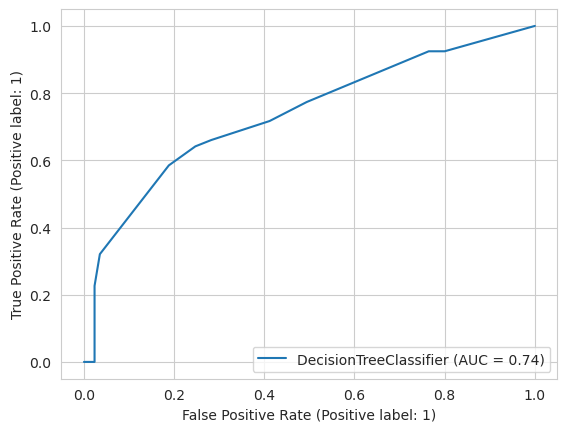

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay


# Use the fitted model to make predictions on your testing data
y_pred = dt.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Plot the ROC curve
disp = RocCurveDisplay.from_estimator(dt, X_test, y_test)


In [94]:
#Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
#variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
#trends.

In [95]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.7246376811594203


In [96]:
# Get feature importances
importances = dt.feature_importances_

# Print feature importances
for i, importance in enumerate(importances):
    print('Feature %d: %f' % (i, importance))

Feature 0: 0.046313
Feature 1: 0.515655
Feature 2: 0.041318
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.166887
Feature 6: 0.140490
Feature 7: 0.089336


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               688 non-null    int64  
 1   Glucose                   688 non-null    int64  
 2   BloodPressure             688 non-null    int64  
 3   SkinThickness             688 non-null    int64  
 4   Insulin                   688 non-null    int64  
 5   BMI                       688 non-null    float64
 6   DiabetesPedigreeFunction  688 non-null    float64
 7   Age                       688 non-null    int64  
 8   Outcome                   688 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 53.8 KB


### Based on above Glucose level in the blood is the most important feature in determining Diabetes Patients

In [98]:
#Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
#dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
#risks.

In [99]:
# Perform sensitivity analysis by varying one input at a time
for i in range(X.shape[1]):
    X_sensitivity = X.copy()
    X_sensitivity.iloc[:, i] = X_sensitivity.iloc[:, i] + 0.1 * X_sensitivity.iloc[:, i].std()
    y_sensitivity = dt.predict(X_sensitivity)
    accuracy_sensitivity = accuracy_score(y, y_sensitivity)
    print('Feature %d sensitivity: %f' % (i, accuracy_sensitivity))

Feature 0 sensitivity: 0.789244
Feature 1 sensitivity: 0.786337
Feature 2 sensitivity: 0.790698
Feature 3 sensitivity: 0.789244
Feature 4 sensitivity: 0.789244
Feature 5 sensitivity: 0.784884
Feature 6 sensitivity: 0.789244
Feature 7 sensitivity: 0.780523


It seems the sensitivity is quite high for most of the features in the dataset and is most sensitive to Feature 2 which is blood pressure level